In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('USA_Housing.csv')

In [15]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
dataset.duplicated().sum()

0

In [9]:
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

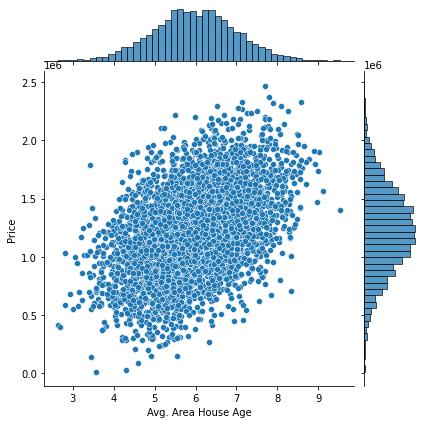

In [14]:
sns.jointplot(x='Avg. Area House Age',y='Price',data=dataset)

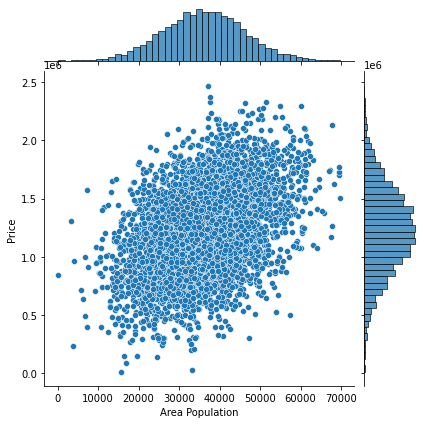

In [16]:
sns.jointplot(x='Area Population',y='Price',data=dataset)

EXPLORATORY DATA ANALYSIS

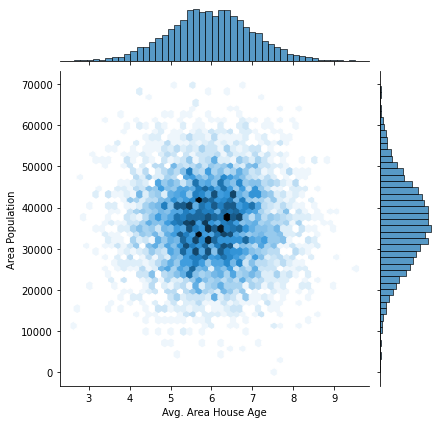

In [25]:
#Use jointplot to create a 2D hex bin plot comparing Avg. Area House Age and Area Population
sns.jointplot(x='Avg. Area House Age',y='Area Population',kind='hex',data=dataset)

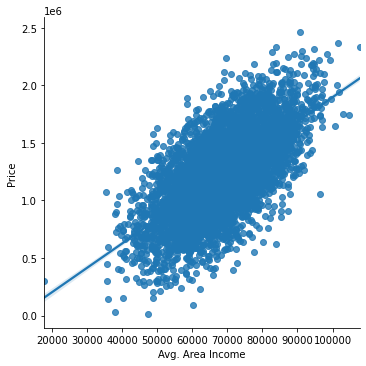

In [23]:
#Create a linear model plot (using seaborn’s Lmplot) of Avg. Area Income and Price.
sns.lmplot(x ='Avg. Area Income', y ='Price', data = dataset)

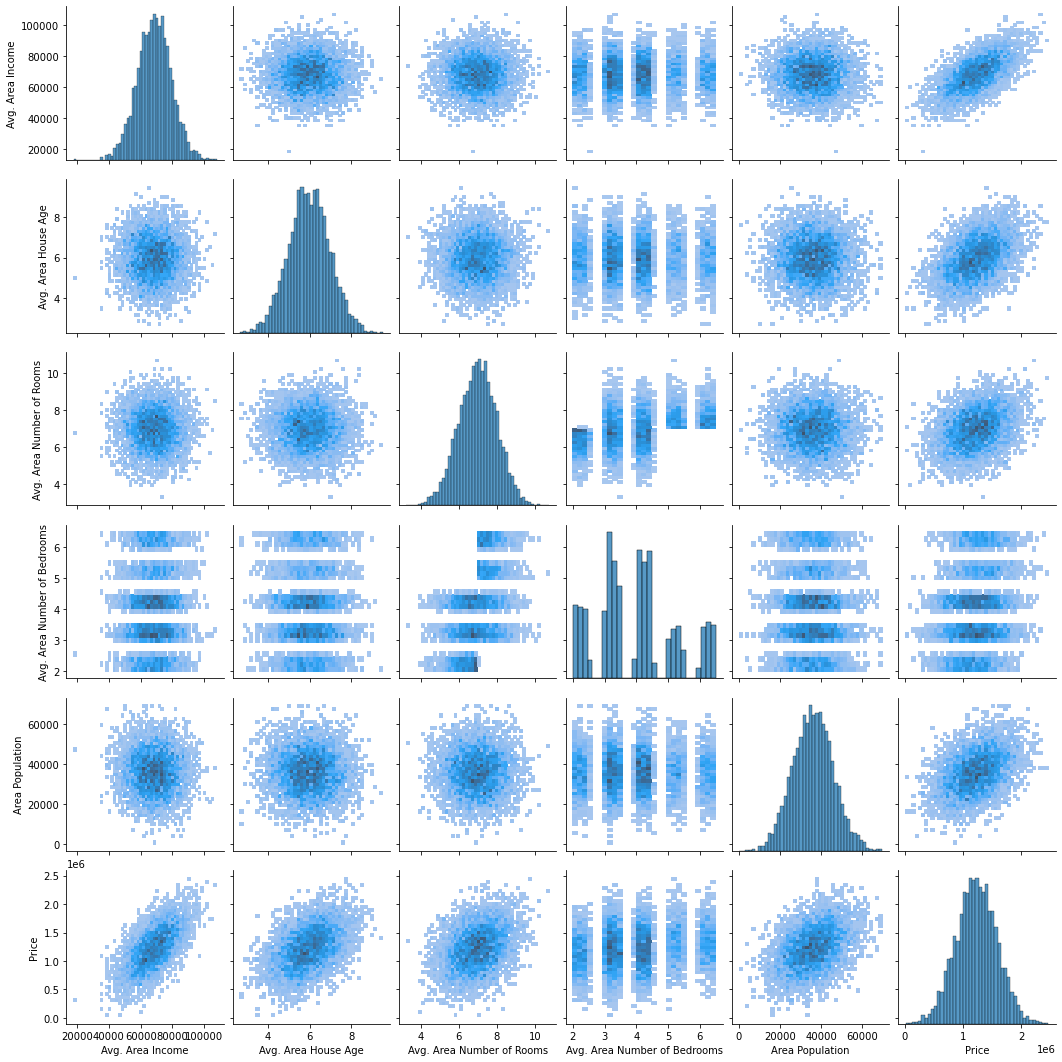

In [24]:
#Create a pairplot. Based off of this plot what looks to be the most correlated feature with Price Feature?
sns.pairplot(dataset, kind="hist")

WHY DO WE DO FEATURE SCALING

In [26]:
#normalises data within a particular range and also helps in speeding up the calculations in an algorithm.
#e.g AGE & CGPA,both the features have different scales,there is a chance that higher weightage given to features with higher magnitude
#This will impact the performance of the machine learning algorithm & WE dont want our algorithm to be biassed towards one feature.
#Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

HOW TO DO FEATURE SCALING

In [36]:
from sklearn.preprocessing import MinMaxScaler
standardscaler = MinMaxScaler()

In [52]:
x=dataset.drop(['Price','Address'],axis=1)
y=dataset['Price']


In [53]:
x.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217


In [48]:
y.head(2)

0    1059033.558
1    1505890.915
Name: Price, dtype: float64

In [56]:
#USING STANDARD SCALER-sklearn.preprocessing package is used and we import this way-from sklearn.preprocessing import StandardScaler
#USING MINMAX SCALER
 

minmax_dataset = standardscaler.fit_transform(x) 
minmax_dataset

array([[0.68682217, 0.44198584, 0.50150158, 0.46444444, 0.3299422 ],
       [0.68352073, 0.48853836, 0.46450137, 0.24222222, 0.57596801],
       [0.48373705, 0.46860901, 0.70135011, 0.69555556, 0.52858204],
       ...,
       [0.50713527, 0.67002636, 0.20853446, 0.02888889, 0.47651494],
       [0.55841872, 0.4203891 , 0.51757886, 0.76444444, 0.61128233],
       [0.53071451, 0.48699729, 0.47267788, 0.46      , 0.66708815]])

SPLITING THE DATA INTO TEST AND TRAINING SET

In [64]:
from sklearn.model_selection import train_test_split

In [67]:
#random_state is the object that controls randomization during splitting.The default value is None.

x__train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=101)

In [77]:
x_train


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1303,68091.17968,5.364208,7.502956,3.10,44557.37966
1051,75729.76555,5.580599,7.642973,4.21,29996.01845
4904,70885.42082,6.358747,7.250241,5.42,38627.30147
931,73386.40734,4.966360,7.915453,4.30,38413.49048
4976,75046.31379,5.351169,7.797825,5.23,34107.88862
...,...,...,...,...,...
4171,56610.64256,4.846832,7.558137,3.29,25494.74030
599,70596.85095,6.548274,6.539986,3.10,51614.83014
1361,55621.89910,3.735942,6.868291,2.30,63184.61315
1547,63044.46010,5.935261,5.913454,4.10,32725.27954


In [69]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.99582,5.717143,7.795215,4.32,36788.98033
2511,62184.53937,4.925758,7.427689,6.22,26008.30912
345,73643.05730,6.766853,8.337085,3.34,43152.13958
2521,61909.04144,6.228343,6.593138,4.29,28953.92538
54,72942.70506,4.786222,7.319886,6.41,24377.90905
...,...,...,...,...,...
1776,65173.05044,7.679469,6.602618,4.23,44125.54078
4269,42969.65939,6.295501,7.885507,4.38,29594.08986
1661,48735.92451,5.543730,6.091906,2.43,19682.34729
2410,65081.58405,5.433570,9.212518,5.14,37594.49346


In [70]:
y_train

array([3819, 2229, 4069, ..., 1784,  762, 4967], dtype=int64)

In [71]:
y_test

array([2628,  786, 4524, ...,    4, 3095, 4865], dtype=int64)

TRAINING THE MODEL

In [72]:
from sklearn.linear_model import LinearRegression

In [79]:
lreg = LinearRegression()


In [81]:
lreg.fit(x_train,y_train)

LinearRegression()

In [85]:
#fit a model
lreg.coef_

array([8.63761555e-02, 6.66346980e+02, 4.77201147e+02, 1.04768688e+01,
       6.12297270e-02])

In [87]:
predictions = lreg.predict(x_test)

Text(0, 0.5, 'Predicted Y')

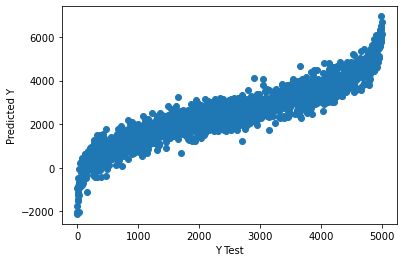

In [88]:
plt.scatter(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Evaluating the Model

In [89]:
#Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.
from sklearn import metrics
from math import sqrt

print('MAE:', 
      metrics.mean_absolute_error(y_test, predictions), ' ',
      (1./len(y_test))*(sum(abs(y_test-predictions))))
print('MSE:', 
      metrics.mean_squared_error(y_test, predictions), ' ',
      (1./len(y_test))*(sum((y_test-predictions)**2)))
print('RMSE:', 
      np.sqrt(metrics.mean_squared_error(y_test, predictions)), ' ',
      sqrt((1./len(y_test))*(sum((y_test-predictions)**2))))

MAE: 409.4284034137579   409.4284034137575
MSE: 262991.5370655348   262991.5370655351
RMSE: 512.827005008058   512.8270050080583


C:\Users\ANGELA\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

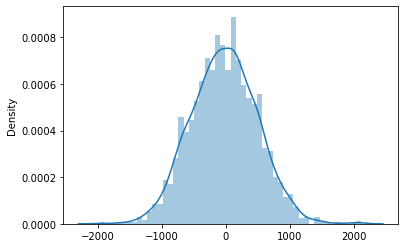

In [90]:
sns.distplot((y_test-predictions), bins = 50)